In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
# Load data
df = pd.read_csv("../data/Employee_Salary_Dataset.csv")

In [ ]:
# Remove outliers
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

In [ ]:
# Encode
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

In [ ]:
# Features
X = df.drop(columns=['ID', 'Salary']).values
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
# Log transformation
y_log = np.log1p(df['Salary'].values)

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

In [ ]:
# Train model
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Prediction
y_pred_log = reg.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

In [ ]:
# 9. Performance metrics
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MAE: 13765.100480032932
R^2: 0.9975587871589146


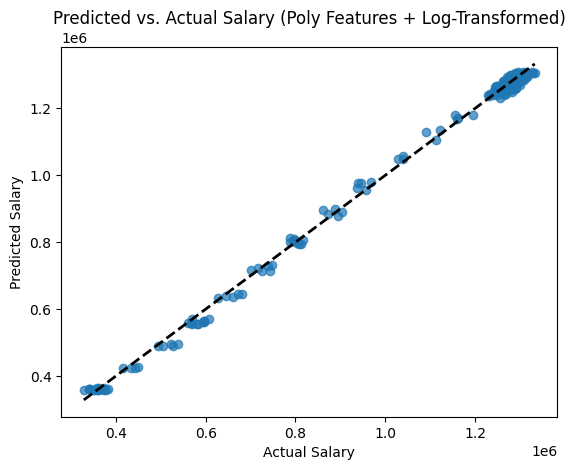

In [11]:
# 10. Visualize
plt.scatter(y_test_actual, y_pred, alpha=0.7)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'k--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Predicted vs. Actual Salary (Poly Features + Log-Transformed)")
plt.show()